# Part 1: Modeling Challenge


Python Coding and Data Set

Let's start by loading several of the libraries that we will use throughout this notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1.1 Python Coding and Data Set

### Prompt
- Load in the data file and header file provided
- The dataframe does not currently have a header, load in the header file and attach it to the dataframe
- Comment on any steps you might take to evaluate or transform the dataset.

### Answers

Let's strart loadingh the header file

In [2]:
f= open('field_names.txt','r')
lines = f.readlines()
print(lines)

['ID\n', 'diagnosis\n', 'radius_mean\n', 'radius_sd_error\n', 'radius_worst\n', 'texture_mean\n', 'texture_sd_error\n', 'texture_worst\n', 'perimeter_mean\n', 'perimeter_sd_error\n', 'perimeter_worst\n', 'area_mean\n', 'area_sd_error\n', 'area_worst\n', 'smoothness_mean\n', 'smoothness_sd_error\n', 'smoothness_worst\n', 'compactness_mean\n', 'compactness_sd_error\n', 'compactness_worst\n', 'concavity_mean\n', 'concavity_sd_error\n', 'concavity_worst\n', 'concave_points_mean\n', 'concave_points_sd_error\n', 'concave_points_worst\n', 'symmetry_mean\n', 'symmetry_sd_error\n', 'symmetry_worst\n', 'fractal_dimension_mean\n', 'fractal_dimension_sd_error\n', 'fractal_dimension_worst']


Note that the new line character is happended to the column names in the header file. Let's strip that character from the strings 

In [3]:
column_names = [s.strip('\n') for s in lines]
print(column_names)

['ID', 'diagnosis', 'radius_mean', 'radius_sd_error', 'radius_worst', 'texture_mean', 'texture_sd_error', 'texture_worst', 'perimeter_mean', 'perimeter_sd_error', 'perimeter_worst', 'area_mean', 'area_sd_error', 'area_worst', 'smoothness_mean', 'smoothness_sd_error', 'smoothness_worst', 'compactness_mean', 'compactness_sd_error', 'compactness_worst', 'concavity_mean', 'concavity_sd_error', 'concavity_worst', 'concave_points_mean', 'concave_points_sd_error', 'concave_points_worst', 'symmetry_mean', 'symmetry_sd_error', 'symmetry_worst', 'fractal_dimension_mean', 'fractal_dimension_sd_error', 'fractal_dimension_worst']


We proceed to create the dataframe from the csv data file and assign the column names from the header file.

In [4]:
df = pd.read_csv('breast-cancer.csv',header=None,names=column_names)

Next, we inspect the initial rows of the dataframe and get the information on the data types in each column

In [5]:
df.head(5)

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
ID                            569 non-null int64
diagnosis                     569 non-null object
radius_mean                   569 non-null float64
radius_sd_error               569 non-null float64
radius_worst                  569 non-null float64
texture_mean                  569 non-null float64
texture_sd_error              569 non-null float64
texture_worst                 569 non-null float64
perimeter_mean                569 non-null float64
perimeter_sd_error            569 non-null float64
perimeter_worst               569 non-null float64
area_mean                     569 non-null float64
area_sd_error                 569 non-null float64
area_worst                    569 non-null float64
smoothness_mean               569 non-null float64
smoothness_sd_error           569 non-null float64
smoothness_worst              569 non-null float64
compactness_mean              5

In [7]:
attributes_mean = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean'
                   ,'concavity_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean']

In [8]:
attributes = ['radius','texture','perimeter','area','smoothness','compactness',
              'concavity','concave_points','symmetry','fractal_dimension']

In [9]:
df.isnull().any()

ID                            False
diagnosis                     False
radius_mean                   False
radius_sd_error               False
radius_worst                  False
texture_mean                  False
texture_sd_error              False
texture_worst                 False
perimeter_mean                False
perimeter_sd_error            False
perimeter_worst               False
area_mean                     False
area_sd_error                 False
area_worst                    False
smoothness_mean               False
smoothness_sd_error           False
smoothness_worst              False
compactness_mean              False
compactness_sd_error          False
compactness_worst             False
concavity_mean                False
concavity_sd_error            False
concavity_worst               False
concave_points_mean           False
concave_points_sd_error       False
concave_points_worst          False
symmetry_mean                 False
symmetry_sd_error           

In [10]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

**Observations:**
- There are no null values in the daframe. 
- The values in the diagnosis column are string labels, i.e., 'M' for malignant and 'B' for begning. We will convert these labels into zero and one integer values (0 for 'B' and 1 for 'M') that will be used as target values for the classifier.  
- The first column is an integer that specifies the "ID" of each instance in the data set. This "ID" feature is not relevant to the classification problem that we are considering and we will drop it.

In [11]:
df.drop('ID', axis=1, inplace=True)

In [12]:
def diagnosis2label(x):
    if x == 'M':
        return 1
    elif x == 'B':
        return 0

df['diagnosis'] = df['diagnosis'].apply(lambda x: diagnosis2label(x))

In [13]:
df.head()

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Prompt
- Compute the mean and median smoothness and compactness for benign and malignant tumors - do they differ? Explain how you would identify this.

### Answer
We computer the median and mean of the 'smoothness_mean' and 'compactness_mean':

In [14]:
i_malign = df['diagnosis'] == 1
i_begnign = df['diagnosis'] == 0

In [15]:
print(df[i_malign]['smoothness_mean'].mean())
print(df[i_malign]['smoothness_mean'].median())

4.323929245283021
3.6795


In [16]:
print(df[i_begnign]['smoothness_mean'].mean())
print(df[i_begnign]['smoothness_mean'].median())

2.0003212885154085
1.851


In [17]:
print(df[i_malign]['compactness_mean'].mean())
print(df[i_malign]['compactness_mean'].median())

0.03228116509433961
0.02859


In [18]:
print(df[i_begnign]['compactness_mean'].mean())
print(df[i_begnign]['compactness_mean'].median())

0.02143824649859945
0.016309999999999998


Both median and mean of the smoothness_mean and compactness_mean attributes are different between the malignant and begnign class. We could visually identify this difference by plotting via histograms the distribution of the smoothness_mean and compactness_mean for the begnin and malignant class. These distributions would be shifted with respect to each other with distinct maxima and would only partially overlap. 

** Prompt:**

- Write a function to generate bootstrap samples of the data.

In [19]:
df.shape

(569, 31)

** Answer **

In [20]:
def bootstrap(df,sample_size):
    ixboot=np.random.choice(df.shape[0], size=sample_size, replace=True)
    df_bstrap = df.iloc[ixboot,:]
    return df_bstrap

In [21]:
df_bstrap = bootstrap(df,100)

## 1.2 Exploratory Analysis

### Prompt
- Identify 2-3 variables that are predictive of a malignant tumor.
- Display the relationship visually and write 1-2 sentences explaining the relationship.

### Answers

I will first identify strongly correlated attributes and remove them from the dataframe.

In [22]:
X=df.iloc[:,1:]

In [23]:
features = list(X.columns)

len(features)

30

Calculate the correlation matrix of the attributes and visualize it with a color map.

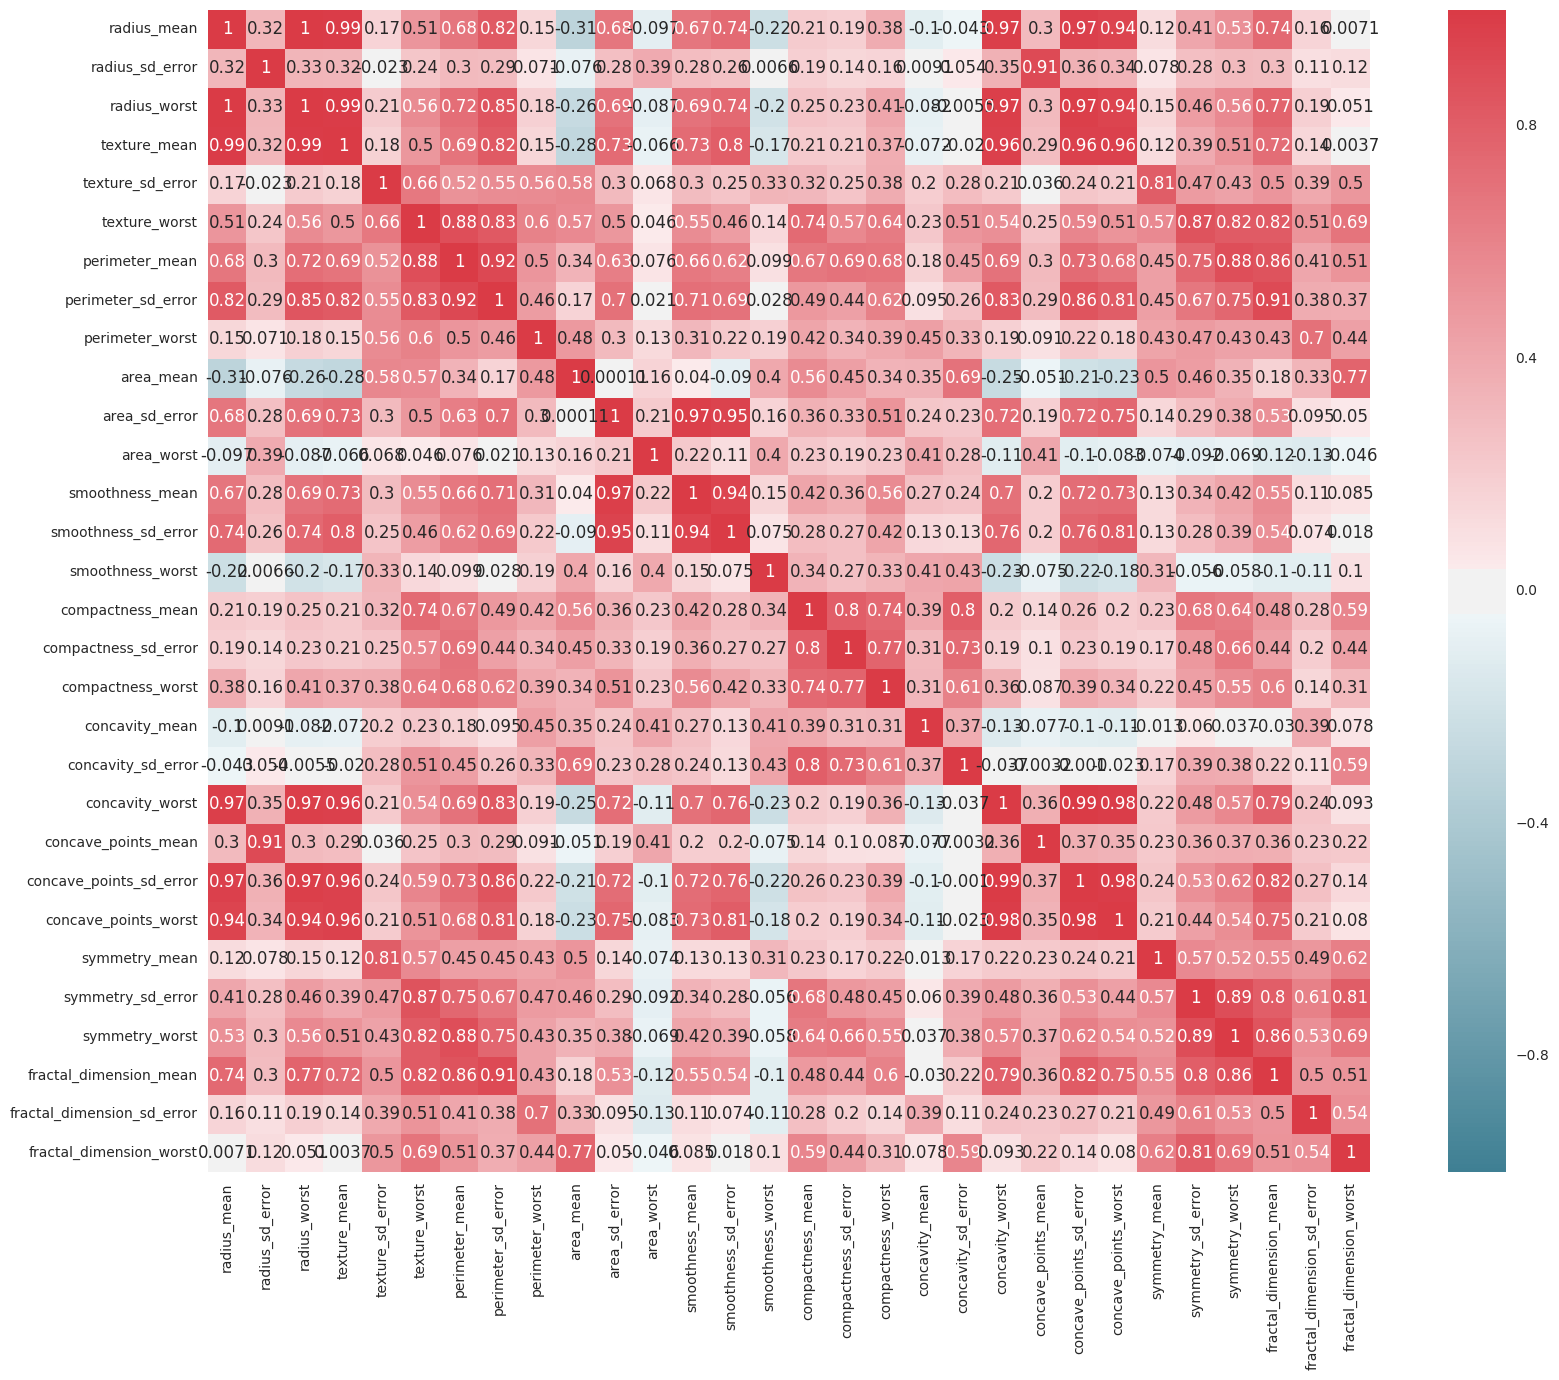

In [24]:
corr = df[features].corr()
g , ax = plt.subplots( figsize = ( 20 , 15 ) )
sns.heatmap(corr, 
                mask=np.zeros_like(corr, dtype=np.bool), 
                cmap=sns.diverging_palette(220, 10, as_cmap=True),
                square=True, 
                ax=ax,
                annot = True)
plt.show()

One observes that there are pairs of attributes with correlation close to 1. We will simplify the data set as follows: we will loop over all the distinct of attributes and for a given pair remove the second attribute from the dataframe when the correlation coefficient for that pair is larger than 0.975.

In [25]:
features_uncorr = features.copy()
corr = X.corr()
for lf in range(len(features)):
    if features[lf] in features_uncorr:
        for lf1 in range(lf+1,len(features)) :
            if corr.iloc[lf,lf1] > 0.975:
                print(lf,lf1,corr.iloc[lf,lf1])
                features_uncorr.remove(features[lf1])
    
    

0 2 0.997855281494
0 3 0.987357170057
20 22 0.993707916103
20 23 0.984014564459


Generate the dataframe with the labels pluts the uncorrelated attributes just identified.

In [26]:
df_uncorr = df[['diagnosis']+features_uncorr]

The prompt requests to identify 2-3 variables that are predictive of a malignant tumor. We will calculate and inspect the correlation between the diagnosis label and all the other features.


In [27]:
corr_matrix = df_uncorr.corr()
corr_matrix['diagnosis'].sort_values(ascending=False)

diagnosis                     1.000000
fractal_dimension_mean        0.793566
perimeter_sd_error            0.776614
concavity_worst               0.776454
radius_mean                   0.730029
perimeter_mean                0.696360
symmetry_worst                0.659610
texture_worst                 0.596534
symmetry_sd_error             0.590998
area_sd_error                 0.567134
smoothness_mean               0.556141
smoothness_sd_error           0.548236
concave_points_mean           0.456903
symmetry_mean                 0.421465
fractal_dimension_sd_error    0.416294
radius_sd_error               0.415185
compactness_worst             0.408042
texture_sd_error              0.358560
perimeter_worst               0.330499
fractal_dimension_worst       0.323872
compactness_mean              0.292999
compactness_sd_error          0.253730
concavity_sd_error            0.077972
concavity_mean               -0.006522
area_worst                   -0.008303
area_mean                

The three largest positive correlation coefficients are found for the following attribues: 'fractal_dimension_mean', 'perimeter_sd_error', 'concavity_worst'.

### Prompt
- Display the relationship visually and write 1-2 sentences explaining the relationship.

### Answer
In the following cells, we display scatter plots for all of the pairs of predictive attributes found via the correlation analysis performed above. We observe in these plots that the malignant and begnign data points form clusters with only limited overlap. It appears that the smallest overlap of the two classes occurs when the pair of features 'perimeter_sd_error' and 'concavity_worst' as well as the pair 'fractal_dimensiona_mean' and 'concavity_worst' are used as attributes. With these pairs of attributes a straight line appears to be a good separator between the two classes.  

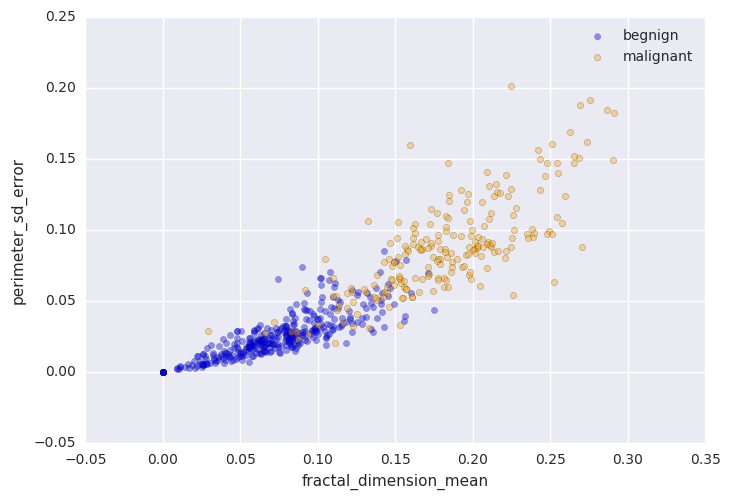

In [28]:
color = ['blue','orange']
class_label = ['begnign','malignant']
plt.xlabel('fractal_dimension_mean')
plt.ylabel('perimeter_sd_error')
#plt.xlabel

for label in [0,1]:
    index = df_uncorr['diagnosis'] == label
    plt.scatter(df_uncorr[index]["fractal_dimension_mean"],
                df_uncorr[index]["perimeter_sd_error"],
                alpha = 0.4,
                c=color[label],
                label=class_label[label])
plt.legend()
plt.show()

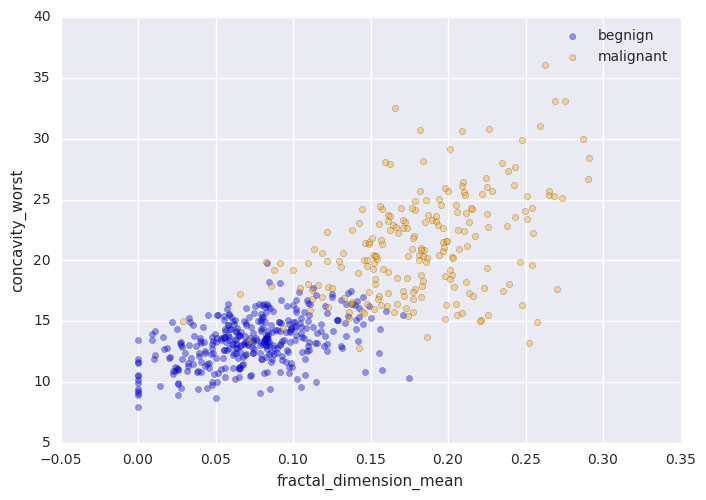

In [29]:
color = ['blue','orange']
class_label = ['begnign','malignant']

plt.xlabel('fractal_dimension_mean')
plt.ylabel('concavity_worst')

for label in [0,1]:
    index = df_uncorr['diagnosis'] == label
    plt.scatter(df_uncorr[index]["fractal_dimension_mean"],
                df_uncorr[index]["concavity_worst"],
                alpha = 0.4,
                c=color[label],
                label=class_label[label])
plt.legend()
plt.show()

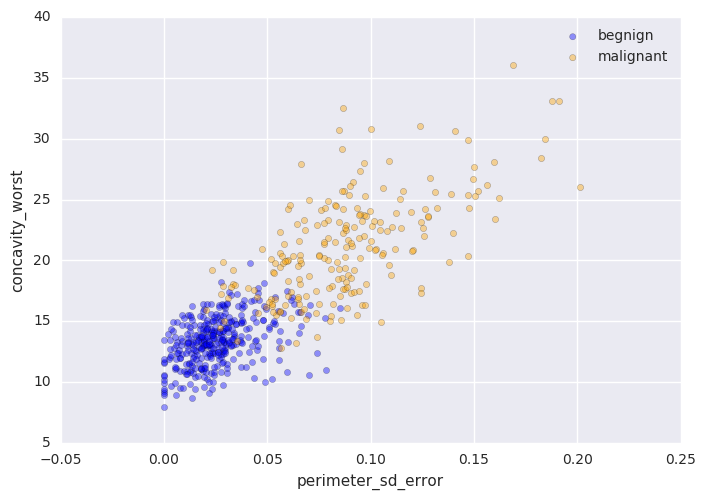

In [30]:
color = ['blue','orange']
class_label = ['begnign','malignant']

plt.xlabel('perimeter_sd_error')
plt.ylabel('concavity_worst')


for label in [0,1]:
    index = df_uncorr['diagnosis'] == label
    plt.scatter(df_uncorr[index]["perimeter_sd_error"],
                df_uncorr[index]["concavity_worst"],
                alpha = 0.4,
                c=color[label],
                label=class_label[label])
plt.legend()
plt.show()

## 1.3 Modeling

### Prompt
- Build a model to predict the malignant tumors.
    * Use at least two classification techniques; compare and contrast the advantages and disadvantages of each.
    * Identify how you would control for overfitting in each classification technique.
    * Evaluate the performance of each model.
    * In each model, identify the most important predictive variables and explain how you identified them.

** Initial setup **

We will start by preparing the train and test set to use for building the classification model applying machine learning techniques. We will use the Stratisfied version of the scikit-learn split function that generates the two data sets so as to preserve in both sets the same distribution between the two classes as in the initial data set.

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report

In [32]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.20,random_state=1762)

for train_index, test_index in split.split(df_uncorr,df_uncorr['diagnosis']):
    df_train = df_uncorr.loc[train_index,]
    df_test  = df_uncorr.loc[test_index]

In [33]:
X_train = df_train[features_uncorr]  # we only take the first two features.
y_train = df_train['diagnosis']

In [34]:
X_test = df_test[features_uncorr]  # we only take the first two features.
y_test = df_test['diagnosis']

### Prompt
* Use at least two classification techniques; compare and contrast the advantages and disadvantages of each.


### Answer

We are going to use the following classification techqnues: decision tree, random forest, and lostistic regression.
Logistic regression optimizes an hyperplane to divide the two classes in the feature space and would not be able to reconstruct non-linear classification boundaries. Decision trees and random forest are models that can map non-linear classification boundaries. 

The advantage of logistic regression is its simplicity: the number of parameters involved in the training is set by the number of features in the input data and the only parameter that left to cross-validate is the coefficient of the regularization term. Decision trees and random forest include several parameters that are not set by the dimensionality of the data and that should be considered for cross validation.  

### Prompt
Identify how you would control for overfitting in each classification technique.

### Answer
To control overfitting I would use k-fold cross-validation so as to choose the optimal set of parameters that define the model and objective function. As score for cross validation I would use the F1 score. In the case of logistic regression I would cross-validate the model against the value of the regularization parameter. In the case of the decision tree and random forest model the parameters that I woul consider in the cross-validation include the max_depth of the trees and the minimum number of sample splits.

### Prompt
* Evaluate the performance of each model.

### Answer

To evaluate the performance of the classifiers we are going to inspect the precision and recall as well as the F1 score.

** Classification by a decision tree **

In [35]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier()

In [36]:
treeclf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [37]:
feature_relevance = zip(features_uncorr,treeclf.feature_importances_)
sorted(feature_relevance, key=lambda x: x[1], reverse=True)

[('perimeter_sd_error', 0.70688716469066837),
 ('concavity_worst', 0.096459803385825035),
 ('concave_points_mean', 0.087454285990712061),
 ('radius_sd_error', 0.046759199097138986),
 ('smoothness_sd_error', 0.012097864467264312),
 ('area_sd_error', 0.0093230732415010096),
 ('fractal_dimension_worst', 0.0088041795665634685),
 ('symmetry_sd_error', 0.0084520123839009302),
 ('fractal_dimension_mean', 0.0082172342621259029),
 ('perimeter_worst', 0.0078259373925008598),
 ('concavity_sd_error', 0.006260749914000688),
 ('smoothness_worst', 0.0014584956077984511),
 ('radius_mean', 0.0),
 ('texture_sd_error', 0.0),
 ('texture_worst', 0.0),
 ('perimeter_mean', 0.0),
 ('area_mean', 0.0),
 ('area_worst', 0.0),
 ('smoothness_mean', 0.0),
 ('compactness_mean', 0.0),
 ('compactness_sd_error', 0.0),
 ('compactness_worst', 0.0),
 ('concavity_mean', 0.0),
 ('symmetry_mean', 0.0),
 ('symmetry_worst', 0.0),
 ('fractal_dimension_sd_error', 0.0)]

### Prompt

In each model, identify the most important predictive variables and explain how you identified them.

### Answer

In the case of decision tree and random forest models, scikit-learn provides as output of the training process a measure of the importance of each variable. Here, the decision tree model is trained using the default scikit-learn parameters. The top two variables for importance are 'perimeter_sd_error' and 'concavity_worst'. Note that these variables are two of the variables for which we found a prominent correlation with the class label and using which one can obtain a separation of the two classes of data points with small overlap (see plot above). 

In [38]:
y_pred = treeclf.predict(X_test) 

In [39]:
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, treeclf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.97      0.93      0.95        72
          1       0.89      0.95      0.92        42

avg / total       0.94      0.94      0.94       114




** Classification by a random forest **

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rfclf = RandomForestClassifier()
rfclf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [42]:
rfclf.feature_importances_

array([ 0.01179709,  0.01839642,  0.00440162,  0.01143036,  0.08324326,
        0.19939697,  0.00600774,  0.0036988 ,  0.00463833,  0.00734344,
        0.00234783,  0.20042063,  0.01451773,  0.0074466 ,  0.01035528,
        0.00255821,  0.00416266,  0.00598797,  0.1325728 ,  0.01599157,
        0.00411113,  0.0423888 ,  0.01770417,  0.18163282,  0.00621865,
        0.00122909])

In [43]:
feature_relevance = zip(features_uncorr,rfclf.feature_importances_)

In [44]:
#print(list(feature_relevance).sort())
sorted(feature_relevance, key=lambda x: x[1], reverse=True)
#sorted(list(feature_relevance), key=itemgetter(1))

[('smoothness_sd_error', 0.20042063310545838),
 ('perimeter_sd_error', 0.1993969659718684),
 ('fractal_dimension_mean', 0.18163282249139229),
 ('concavity_worst', 0.13257279920466794),
 ('perimeter_mean', 0.083243262126610554),
 ('symmetry_sd_error', 0.042388801472273668),
 ('radius_sd_error', 0.018396422097970773),
 ('symmetry_worst', 0.017704167428451711),
 ('concave_points_mean', 0.015991573387296128),
 ('smoothness_worst', 0.01451773327764674),
 ('radius_mean', 0.011797092129449262),
 ('texture_worst', 0.011430364483962119),
 ('compactness_sd_error', 0.010355284946632654),
 ('compactness_mean', 0.0074466003808468127),
 ('area_worst', 0.0073434433866843172),
 ('fractal_dimension_sd_error', 0.0062186530631931723),
 ('perimeter_worst', 0.0060077410196647963),
 ('concavity_sd_error', 0.0059879662144265156),
 ('area_sd_error', 0.004638327728949709),
 ('texture_sd_error', 0.0044016158198756667),
 ('concavity_mean', 0.0041626587334822633),
 ('symmetry_mean', 0.0041111298757561254),
 ('are

### Variable importance in the random forest model

The top two variables for importance in the random forest model obtained here are 'perimeter_sd_error' and 'concavity_worst', like in the case of the decision tree model. This strongly indicates the importance of these two variables to optimally classify the data points. 

In [45]:
y_pred = rfclf.predict(X_test) 

In [46]:
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
#y_true, y_pred = y_test, treeclf.predict(X_test)
print(classification_report(y_test, y_pred))
print()

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.97      0.93      0.95        72
          1       0.89      0.95      0.92        42

avg / total       0.94      0.94      0.94       114




** Logistic regression**

In [47]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

In [48]:
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
logit.coef_

array([[-0.86117483, -0.38395452, -0.16476957,  0.42789659,  0.96198951,
         0.59416733, -0.35207568, -0.20931744, -1.21089591, -1.91152889,
        -1.17254442,  0.23468623, -0.00786745, -0.03434566, -0.18202894,
         0.01567889, -0.05314955, -0.02576239,  0.57948117,  0.40492715,
        -0.16213884,  1.55999993,  2.15725566,  0.95943968, -0.16143534,
        -0.11181595]])

### Variable importance in the logisitc regression model

To determine the importance variable in the logisitc regression model we look at the absolute value of the coeffient of the hyperplane. We find that the top two variables for importance are 'symmetry_worst' and 'area_worst'. This result might depend on the strength of the regularization coefficient.

In [50]:
lr_coeff = logit.coef_.reshape(len(features_uncorr))

In [51]:
feature_relevance= list(zip(features_uncorr,np.abs(lr_coeff)))

In [52]:
sorted(feature_relevance, key=lambda x: x[1], reverse=True)

[('symmetry_worst', 2.1572556637484026),
 ('area_worst', 1.9115288872886382),
 ('symmetry_sd_error', 1.5599999333177277),
 ('area_sd_error', 1.2108959133344608),
 ('smoothness_mean', 1.1725444243385597),
 ('perimeter_mean', 0.96198951319810966),
 ('fractal_dimension_mean', 0.95943968100760957),
 ('radius_mean', 0.86117482637526266),
 ('perimeter_sd_error', 0.59416733012539535),
 ('concavity_worst', 0.57948116843973319),
 ('texture_worst', 0.42789658858196516),
 ('concave_points_mean', 0.40492714677632419),
 ('radius_sd_error', 0.38395452230877175),
 ('perimeter_worst', 0.35207567811895363),
 ('smoothness_sd_error', 0.23468623174640046),
 ('area_mean', 0.20931744070346145),
 ('compactness_sd_error', 0.18202894354868182),
 ('texture_sd_error', 0.16476956767422649),
 ('symmetry_mean', 0.16213883710851409),
 ('fractal_dimension_sd_error', 0.16143533839384783),
 ('fractal_dimension_worst', 0.11181594549270614),
 ('concavity_mean', 0.053149547838006198),
 ('compactness_mean', 0.0343456601401

In [53]:
y_pred = logit.predict(X_test) 

In [54]:
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
#y_true, y_pred = y_test, treeclf.predict(X_test)
print(classification_report(y_test, y_pred))
print()

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.92      0.99      0.95        72
          1       0.97      0.86      0.91        42

avg / total       0.94      0.94      0.94       114




## 1.4 Explanation

### Prompt
- To Technical Audiences: Explain the limitations of your analysis and identify possible further steps you could take.

### Answer
The main limitations of the present analysis are that cross-validation was not performed, feature engineering and selection was not attempted, and only three classification models (of which one trains a linear separation boundary) were tested. Future steps could inlcude: perform cross-validation of each model; define possible combinations of the input attributes and select the relevant features, e.g., via the LASSO method; and test other non-linear classification methods, including gradient boosting and neural nets. 

### Prompt

- To Non-Technical Audiences: Write a short summary of your analysis, explaining how your model works and how it performs. Briefly explain the factors that contributed to malignant vs benign tumor identification.

#### Answer

Here, we used the data obtained by the analysis of tissue samples of about 550 breast cancer patients to build a computer model that is able to automatically detect whether the sample contains malignant or begnign tumor cells. The model achieves an accuracy of ~95 %, that is, is able to provide an answer that is correct in 95 % of the cases. The cell features that most contribute to the identification of a begning vs malignant tumor are the cell perimeter and concavity.


# Part 2: Feedback

In your notebook, move onto "Part 2" and log your responses accordingly. Please provide feedback for both of the sample student submissions provided below. Use the following guidelines to help structure your responses:

** Student sample 1 **

In [ ]:
#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
d = pd.read_csv('../data/train.csv')


# Setup data for prediction
x1 = data.SalaryNormalized
x2 = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')
print(scores.mean())

** Student sample 2 **

In [ ]:
#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
data = pd.read_csv('../data/train.csv')


# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
print(scores.mean())

## 2.1 Code

### Prompt
Feel free to comment on style, library usage, or other improvements.

### Answer

- ** Student 1**: 

The module (sklearn.linear_model) from which to load the LinearRegression function was not specified and because of this bug the script does not execute. The train_test_split and cross_val_score functions are now included in the model_selection module of sklearn. The train_test_split library was not used and cross_val_score was imported twice and this is redundant. 

In terms of style, the student might consider using for the dataframe a variable name containing the customary 'df' string so that it becomes easier to recognize that variable in the script as a pandas dataframe and not a standard python type. The names chosen for the data (x2) and target values (x1) that are passed to the linear regression model make it difficult to distinguish between input and output of the model.


- ** Student 2**:

This code executes correctly. The names used clearly indicate the meaning of the variables and functions used, thus making the code easily readable and understandable.

## 2.2 Methodology

### Prompt
Feel free to comment on the student's data setup, modeling methodology, and model evaluation.

### Answer

Both students use the ContractType column from the dataframe as input of the model. We note that ~65 % of the values in this column are NaN and that the get_dummies pandas function replaces these NaN with zero values. So, effectively, the students are providing no relevant information for ~65 % of the input data points. One should consider to drop the entries with NaN values from the input data.

Neither of the students set up a training and test set. Student 1 seems to have that the a test and training should be generated but this step is not implemented. Student 2 uses cross validation of the model but does not generate a test set on which to test the model after training.

Importantly the fact that there are two categories in ContractType used as input points to the possibility that the modeling task that the students were tackling was building a classifier in which the input feature is SalaryNormalized and the label to predict is ContractType. So, it seems that both students chose linear regression as the machine learning algorithm to use without considering whether it is appropriate for the type of data and task they were addressing and they assumed that what should be the input variable of the classifier is in fact the output variable of the linear regression.


## 2.3 Conceptual Understanding

### Prompt

Finally, feel free to add any suggestions or takeaways on how the student could continue to improve their understanding of these concepts.

### Answer

I would suggest that the students first plot the data they are trying to model. A visual inspection of the data will help recognzie what is the possible nature of the data and the relationship between variables.

### Part 2. Supplementary cells used in Part 2

Exploration of the data set used by the students. Note that ContractType column includes a large number (~65 %) of values that are NaN. 

In [ ]:
df= pd.read_csv('train.csv')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.ContractType.unique()

In [ ]:
X = pd.get_dummies(df.ContractType)

In [ ]:
X